In [99]:
import pandas as pd
import seaborn as sns
import numpy as np

In [100]:
TODAY = pd.Timestamp.today().strftime('%Y-%m-%d')

# Data creation

**TODO**
* create a new df for each feeding day and use a concat

## Sourdough feeding data

### Feeding dates

In [101]:
# creating a more or less true history
past_feeding_dates = pd.date_range(start='2022-07-24', end='2022-12-11', freq='7D')

In [102]:
feeding_dates = []

In [103]:
for i in past_feeding_dates:
  feeding_dates.append(i.strftime('%Y-%m-%d'))

In [104]:
feeding_dates.append(TODAY)

### Temperature

In [105]:
temperature = [22, 22, 22, 22, 23, 21, 21, 21, 20, 20, 20, 20, 19, 19, 20, 19, 18, 18, 19, 19, 18]

In [106]:
temperature_today = 19

In [107]:
temperature.append(temperature_today)

### Time

In [108]:
feeding_time = [8, 7,8,8,9,9,9,8,8,9,12,9,10,8,8,9,9,10,9,10,10]

In [109]:
feeding_time_today = 10

In [110]:
feeding_time.append(feeding_time_today)

### Growth

In [111]:
initial_height = [2.2, 2.4, 2.7, 2.1, 2.8, 2.6, 2.9, 2.4, 2.1, 2.2,
                  2.4, 2.2, 2.9, 2.5, 2.6, 2.9, 2.4, 2.7, 2.0, 2.7, 2.6]

In [112]:
end_height = [7.2, 7.8, 7.9, 6.3, 6.1, 7.5, 6.6, 6.6, 6.1, 7.1,
              7.8, 6.6, 7.3, 7.9, 7.5, 6.5, 6.9, 6.1, 6.2, 7.0, 6.6]

In [113]:
initial_height_today = 2.9

In [114]:
end_height_today = 7.9

In [115]:
initial_height.append(initial_height_today)

In [116]:
end_height.append(end_height_today)

### Bubbles

In [117]:
bubble_size = [0.2, 0.4, 0.3, 0.2, 0.1, 0.1, 0.4, 0.1, 0.3, 0.2, 0.4, 0.2, 0.1,
        0.3, 0.4, 0.2, 0.1, 0.1, 0.4, 0.4, 0.2]

In [118]:
bubble_size_today = 0.3

In [119]:
bubble_size.append(bubble_size_today)

### df

In [120]:
feedings_dict = {
    'feeding_date':feeding_dates, 
    'temperature':temperature,
    'feeding_time':feeding_time,
    'initial_height':initial_height,
    'end_height':end_height,
    'bubble_size':bubble_size
}

In [121]:
feedings = pd.DataFrame(data=feedings_dict)

In [122]:
feedings.head()

,feeding_date,temperature,feeding_time,initial_height,end_height,bubble_size
0,2022-07-24,22,8,2.2,7.2,0.2
1,2022-07-31,22,7,2.4,7.8,0.4
2,2022-08-07,22,8,2.7,7.9,0.3
3,2022-08-14,22,8,2.1,6.3,0.2
4,2022-08-21,23,9,2.8,6.1,0.1


## Utilization

### Baked breads

In [123]:
bread_name = ['Dinkelsonni', 'Italienisches Landbrot', 'Hausbrot', 'Neptune']

In [124]:
baking_date = ['2022-08-13', '2022-09-18', '2022-10-23', '2022-11-01']

In [125]:
bread_rating = [4, 5, 4, 5]

In [126]:
used_starter = [10, 20, 15, 10]

In [127]:
latest_bread = 'Paderborner Landbrot'

In [128]:
latest_baking_date = '2022-12-14'

In [129]:
latest_ranking = 3

In [130]:
latest_starter_used = 30

In [131]:
bread_name.append(latest_bread)

In [132]:
baking_date.append(latest_baking_date)

In [133]:
bread_rating.append(latest_ranking)

In [134]:
used_starter.append(latest_starter_used)

In [135]:
baked_bread_dict = {
    'bread_name':bread_name,
    'baking_date':baking_date,
    'bread_rating':bread_rating,
    'used_starter':used_starter
}

In [136]:
baked_bread = pd.DataFrame(data=baked_bread_dict)

In [137]:
baked_bread['baking_date'] = pd.to_datetime(baked_bread['baking_date'])

In [138]:
baked_bread

,bread_name,baking_date,bread_rating,used_starter
0,Dinkelsonni,2022-08-13,4,10
1,Italienisches Landbrot,2022-09-18,5,20
2,Hausbrot,2022-10-23,4,15
3,Neptune,2022-11-01,5,10
4,Paderborner Landbrot,2022-12-14,3,30


### Utilized sourdough starter

In [148]:
leftover = baked_bread[['baking_date', 'used_starter']]

In [154]:
leftover

,date,rest_starter
0,2022-08-13,10
1,2022-09-18,20
2,2022-10-23,15
3,2022-11-01,10
4,2022-12-14,30


In [155]:
leftover.rename(columns={
    'baking_date':'date',
    'used_starter':'rest_starter'
}, inplace=True)

/var/folders/mm/p2dqwhz10d1dvvs017_jlpb80000gn/T/ipykernel_830/3308530444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leftover.rename(columns={


In [156]:
leftover['rest_starter'] = leftover['rest_starter']*(-1)

/var/folders/mm/p2dqwhz10d1dvvs017_jlpb80000gn/T/ipykernel_830/3003274660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leftover['rest_starter'] = leftover['rest_starter']*(-1)


In [139]:
feedings

,feeding_date,temperature,feeding_time,initial_height,end_height,bubble_size
0,2022-07-24,22,8,2.2,7.2,0.2
1,2022-07-31,22,7,2.4,7.8,0.4
2,2022-08-07,22,8,2.7,7.9,0.3
3,2022-08-14,22,8,2.1,6.3,0.2
4,2022-08-21,23,9,2.8,6.1,0.1
5,2022-08-28,21,9,2.6,7.5,0.1
6,2022-09-04,21,9,2.9,6.6,0.4
7,2022-09-11,21,8,2.4,6.6,0.1
8,2022-09-18,20,8,2.1,6.1,0.3
9,2022-09-25,20,9,2.2,7.1,0.2


In [143]:
feedings[['feeding_date']]

In [144]:
# of 110 g, 10 g sourdough are used for the new one
# and 10 g are lost during handling
leftover['leftover_dough'] = 90

/var/folders/mm/p2dqwhz10d1dvvs017_jlpb80000gn/T/ipykernel_830/378337523.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leftover['leftover_dough'] = 90


In [147]:
pd.concat([leftover, baked_bread[['baking_date', 'used_starter']]],axis=1)

,feeding_date,leftover_dough,baking_date,used_starter
0,2022-07-24,90,2022-08-13,10.0
1,2022-07-31,90,2022-09-18,20.0
2,2022-08-07,90,2022-10-23,15.0
3,2022-08-14,90,2022-11-01,10.0
4,2022-08-21,90,2022-12-14,30.0
5,2022-08-28,90,NaT,NaN
6,2022-09-04,90,NaT,NaN
7,2022-09-11,90,NaT,NaN
8,2022-09-18,90,NaT,NaN
9,2022-09-25,90,NaT,NaN


In [145]:
leftover

,feeding_date,leftover_dough
0,2022-07-24,90
1,2022-07-31,90
2,2022-08-07,90
3,2022-08-14,90
4,2022-08-21,90
5,2022-08-28,90
6,2022-09-04,90
7,2022-09-11,90
8,2022-09-18,90
9,2022-09-25,90


**TODO**
* create a suggestion table for suitable recipes
* caculate cumsum of starter

# Data processing

In [55]:
bacteria_composition = pd.DataFrame({
    'temperature':[20, 25,30, 35],
    'dominant_microbes':['none', 'lactic acid bacteria', 'Acetic acid bacteria', 'sourdough yeast']
})

**TODO**
* improve bacteria composition

**TODO**
* calculate growth rate

# KPIs

## Bread

**Top 3 breads**

In [71]:
baked_bread.sort_values(by='bread_rating', ascending=False)['bread_name'].head(3)

1    Italienisches Landbrot
3                   Neptune
0               Dinkelsonni
Name: bread_name, dtype: object

**Baked breads**

In [100]:
len(baked_bread)

5

**Relevant factors**

# Plots

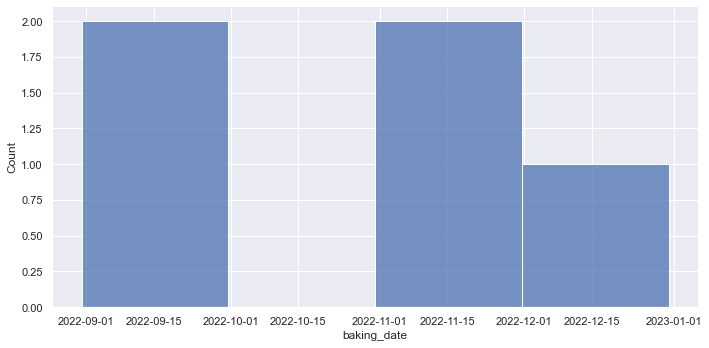

In [133]:
sns.displot(
    data=baked_bread.groupby(pd.Grouper(key="baking_date", freq="M"))[
        "bread_rating"
    ].mean(),
    x="baking_date",
    height=5,
    aspect=2,
);

**TODO**
* Wachstumsrate (Anfangshoehe, Endhoehe)
* baking frequency

# Bread experiments

**TODO**
* Vorgehen + Modifikation + Resultat + Experimentbasis (Brot) 